<a href="https://colab.research.google.com/github/MathBird17/Optimization/blob/main/RedDeGasoductos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final de Optimización I. By Le Ruffy

# Red de gasoductos de gas natural en Estados Unidos.
El gas natural es una mezcla de gases con una mayor proporción de metano el cual sirve como combustible o para la producción de otros materiales. Transportar gas no es facil y sumado a la inmensa demanda en las ciudades hace imposible distribuir el gas natural por medio de camiones, para solventar este problema se usan tuberias en su mayoria subterraneas las cuales permiten transportar de manera continua grandes cantidades de gas natural. \\
La red de gasoductos de Estados Unidos es una de la más grandes del mundo y se divide en esencia en dos redes: interestatal e intraestatal, la primera es la red de gasoductos entre estados y la segunda es la red de gasoductos dentro de un estado. Con una producción de 93.4 billones de pies cubicos por dia y un consumo de 82.96 billones de pies cubicos por dia, la red de gasoductos es muy importante y un fallo en esta podria ser faltal para la economia Estadounidense. En el presente trabajo se estudiara la red interestatal de gasoductos en Estados Unidos, especificamente en la region Oeste, la cual incluye tuberias que conectan con Canada y Mexico, toda la informacion sobre las tuberias, su ubicación y capacidades fue tomada de la Administración de información energetica de Estados Unidos (EIA), la cual cuenta con bancos de datos de la red electrica, de combustibles y demas en su pagina https://www.eia.gov/.
 
# Macro-red de gas natural por regiones de los Estados Unidos.
Existen 6 grandes regiones por las cuales se transporta gas natural en Estados Unidos, estas son: Pacifica, Montañosa, Medio Oeste, Noreste, Sureste y Sur central. Mientras que hay 3 regiones con las que se conecta Estados Unidos con otros paises: Canada, Mexico y el golfo de Mexico. En la siguiente figura se muestran las regiones y las capacidades en sus macro lineas de gasoductos:
![picture](https://drive.google.com/uc?export=view&id=1ekTWLlE1cJdi0UqnzjuIJg3wp3bbw3Au) \\
A continuación, vamos a crear el grafo de los gasoductos entre regiones con el modulo de Python: NetworkX, este nos permitira visualizar cada una de las regiones como un nodo y cada lado del grafo representando el envio de gas con su respectiva capacidad en millones de pies cubicos por dia (MMcfd):


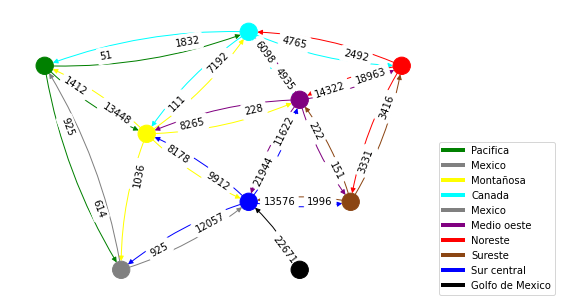

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

red = nx.DiGraph()

red.add_node('pacifica',pos=(0,5),color='green')
red.add_node('montanosa',pos=(2,3),color='yellow')
red.add_node('medio oeste',pos=(5,4),color='purple')
red.add_node('noreste',pos=(7,5),color='red')
red.add_node('sureste',pos=(6,1),color='saddlebrown')
red.add_node('sur central',pos=(4,1),color='blue')
red.add_node('canada',pos=(4,6),color='cyan')
red.add_node('mexico',pos=(1.5,-1),color='grey')
red.add_node('golfo de mexico',pos=(5,-1),color='black')

red.add_edge('pacifica', 'canada',color='green',weight=51)
red.add_edge('pacifica', 'montanosa',color='green',weight=1412)
red.add_edge('pacifica', 'mexico',color='green',weight=925)

red.add_edge('montanosa', 'canada',color='yellow',weight=111)
red.add_edge('montanosa', 'medio oeste',color='yellow',weight=8265)
red.add_edge('montanosa', 'mexico',color='yellow',weight=1036)
red.add_edge('montanosa', 'sur central',color='yellow',weight=8178)
red.add_edge('montanosa', 'pacifica',color='yellow',weight=13448)

red.add_edge('medio oeste', 'canada',color='purple',weight=4935)
red.add_edge('medio oeste', 'montanosa',color='purple',weight=228)
red.add_edge('medio oeste', 'noreste',color='purple',weight=14322)
red.add_edge('medio oeste', 'sur central',color='purple',weight=11622)
red.add_edge('medio oeste', 'sureste',color='purple',weight=222)

red.add_edge('noreste', 'canada',color='red',weight=2492)
red.add_edge('noreste', 'medio oeste',color='red',weight=18963)
red.add_edge('noreste', 'sureste',color='red',weight=3416)

red.add_edge('sureste', 'medio oeste',color='saddlebrown',weight=151)
red.add_edge('sureste', 'noreste',color='saddlebrown',weight=3331)
red.add_edge('sureste', 'sur central',color='saddlebrown',weight=1996)

red.add_edge('sur central', 'mexico',color='blue',weight=12057)
red.add_edge('sur central', 'medio oeste',color='blue',weight=21944)
red.add_edge('sur central', 'montanosa',color='blue',weight=9912)
red.add_edge('sur central', 'sureste',color='blue',weight=13576)

red.add_edge('mexico', 'pacifica',color='grey',weight=614)
red.add_edge('mexico', 'sur central',color='grey',weight=925)

red.add_edge('canada', 'pacifica',color='cyan',weight=1832)
red.add_edge('canada', 'montanosa',color='cyan',weight=7192)
red.add_edge('canada', 'medio oeste',color='cyan',weight=6098)
red.add_edge('canada', 'noreste',color='cyan',weight=4765)

red.add_edge('golfo de mexico', 'sur central',color='black',weight=22671)

edges = red.edges()
cnodes=red.nodes()
colors = [red[u][v]['color'] for u,v in edges]
colors2 = [node[1]['color'] for node in red.nodes(data=True)]
pos=nx.get_node_attributes(red,'pos')
nx.draw(red,pos,edge_color=colors,node_color=colors2,connectionstyle='arc3, rad = 0.1')
nx.draw_networkx_edge_labels(red, pos,{(u,v):red[u][v]['weight'] for u,v in edges},label_pos=0.70,font_size=10)

legend_elements = [Line2D([0], [0], color='green', lw=4, label='Pacifica'),
                   Line2D([0], [0], color='grey',lw=4,  label='Mexico'),
                   Line2D([0], [0], color='yellow',lw=4,  label='Montañosa '),
                   Line2D([0], [0], color='cyan',lw=4,  label='Canada'),
                   Line2D([0], [0], color='grey',lw=4,  label='Mexico'),
                   Line2D([0], [0], color='purple',lw=4,  label='Medio oeste'),
                   Line2D([0], [0], color='red',lw=4,  label='Noreste'),
                   Line2D([0], [0], color='saddlebrown',lw=4,  label='Sureste'),
                   Line2D([0], [0], color='blue',lw=4,  label='Sur central'),
                   Line2D([0], [0], color='black',lw=4,  label='Golfo de Mexico')]

plt.legend(handles=legend_elements, loc=(1,0))
plt.show()


Ahora vamos a analizar la naturaleza de las regiones, para ello se le restan al total de exportaciones el total de importaciones de cada región, si es positivo la región sera exportadora de gas natural, mientras que si es negativo sera importadora:


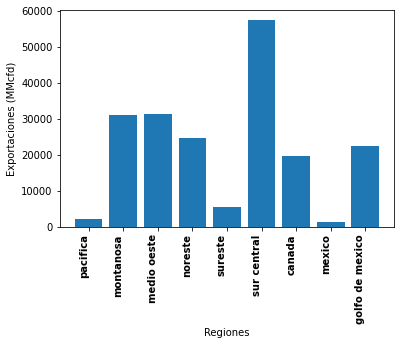

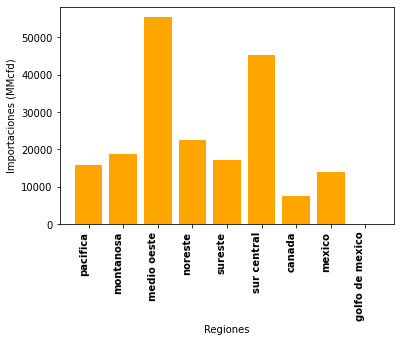

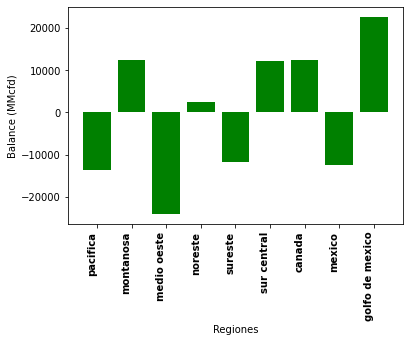

In [ ]:
import numpy as np
regio=list(red.nodes)
exportaciones=[]
for reg in regio:
  exportaciones.append(0)
  for v in regio:
    try:
      exportaciones[-1]=exportaciones[-1]+int(red[reg][v]['weight'])
    except:
      pass
plt.bar(regio, exportaciones)
y_pos = np.arange(len(exportaciones))
plt.xticks(y_pos, regio, color='black', rotation=90, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.xlabel('Regiones')
plt.ylabel('Exportaciones (MMcfd)')
plt.show()

importaciones=[]
for reg in regio:
  importaciones.append(0)
  for v in regio:
    try:
      importaciones[-1]=importaciones[-1]+int(red[v][reg]['weight'])
    except:
      pass
plt.bar(regio, importaciones,color='orange')
y_pos = np.arange(len(importaciones))
plt.xticks(y_pos, regio, color='black', rotation=90, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.xlabel('Regiones')
plt.ylabel('Importaciones (MMcfd)')
plt.show()

balance=[]
for n in range(0,len(regio)):
  balance.append(int(exportaciones[n])-int(importaciones[n]))


plt.bar(regio, balance,color='green')
y_pos = np.arange(len(balance))
plt.xticks(y_pos, regio, color='black', rotation=90, fontweight='bold', fontsize='10', horizontalalignment='right')
plt.xlabel('Regiones')
plt.ylabel('Balance (MMcfd)')
plt.show()

Como se puede observar las regiones exportadoras son la Montañosa, Noreste, Sur central, Canada y el Golfo de mexico, mientras que la mayor exportadora fue la region Sur central, por otro lado, la mayor importadora fue la region Medio oeste. 

# Red interestatal de gas natural en los Estados Unidos.
Ahora que tenemos una idea de cuales son las regiones que más exportan/importan gas natural vamos a estudiar a detalle la red interestatal de gas natural de los Estados Unidos, como aqui si vamos a trabajar con lineas de gasoductos especificas nuestro principal objetivo sera estudiar el flujo maximo de la red cuando un estado se quede sin gas natural o le falle alguna conexión, es claro que no todos los estados son productores de gas natural, por lo tanto los que no lo son podran ser tomados como conexiones o puntos de distribución. A continuación se presenta el mapa de todas las gasoductos interestatales, son un total de 659 tuberias distribuidas en todo el pais: \\
![picture](https://drive.google.com/uc?export=view&id=1qBsSpktB3YxPEg_HPG9LZJ6ilFBmfHDX) \\
El  mayor consumidor de gas natural en Estados unidos es Texas, con un consumo anual aproximado de 4.5 trillones de pies cubicos y un consumo diario aproximado de 12.8 billones de pies cubicos , por otro lado Texas produce un total de 19.7 billones de pies cubicos por dia, todo esto lo convierte en un estado clave para la red de gasoductos. Para ver esto más claro la EIA proporciona un mapa en donde solo se ven los estados productores y la intensidad de su color indica su producción:
 \\
![picture](https://drive.google.com/uc?export=view&id=1pEQmuxXNI77lETe56AA8h9YM9Mk7qYzw) \\




La EIA nos proporciona la información detallada de todos los gasoductos de Estados Unidos, a continuación vamos a extraer toda la información sobre todos los gasoductos interestatales:

In [ ]:
!pip install PuLP

     |████████████████████████████████| 14.2 MB 24.2 MB/s 


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pulp 
import pandas as pd
import numpy as np

RedEstatal = nx.DiGraph()


df=pd.read_excel('Estados.xlsx', index_col=None)
regions=[set(df.index)]
dfT=df.transpose()
print(dfT)
estados=set(list(dfT.iloc[0])+list(dfT.iloc[1]))
ConexionesEstatales=[[dfT.iloc[0][i],dfT.iloc[1][i]] for i in range (0,658)]

for n in estados:
  RedEstatal.add_node(n)

for i in range (0,658):
  if dfT.iloc[0][i]!=dfT.iloc[1][i]:
    RedEstatal.add_edge(dfT.iloc[0][i],dfT.iloc[1][i])

estadoslista=list(estados)


MatrixCapacidades=0*np.empty((58,58))#Hay 58 estados
for i in range (0,658):
  n=estadoslista.index(dfT.iloc[0][i])
  k=estadoslista.index(dfT.iloc[1][i])
  MatrixCapacidades[n][k]=dfT.iloc[2][i]



                           0             1              2           3    \
Estado de origen   Connecticut   Connecticut  Massachusetts  New Jersey   
Estado de destino     New York  Rhode Island   Rhode Island    New York   
Capacidad (mmcfd)          275          1235            275        1625   

                           4           5             6              7    \
Estado de origen      New York    New York  Rhode Island   Rhode Island   
Estado de destino  Connecticut  New Jersey   Connecticut  Massachusetts   
Capacidad (mmcfd)         1830         275           275           1180   

                        8          9    ...       648       649      650  \
Estado de origen       Iowa  Minnesota  ...  Colorado  Colorado     Utah   
Estado de destino  Illinois       Iowa  ...   Wyoming   Wyoming  Wyoming   
Capacidad (mmcfd)      1875       1875  ...        13       341      586   

                        651         652         653           654       655  \
Estado de orig

Aunque no este ordenada, la siguiente figura muestra la red estatal de gasoductos y sirve para darnos una idea de la magnitud y complejidad de esta: 

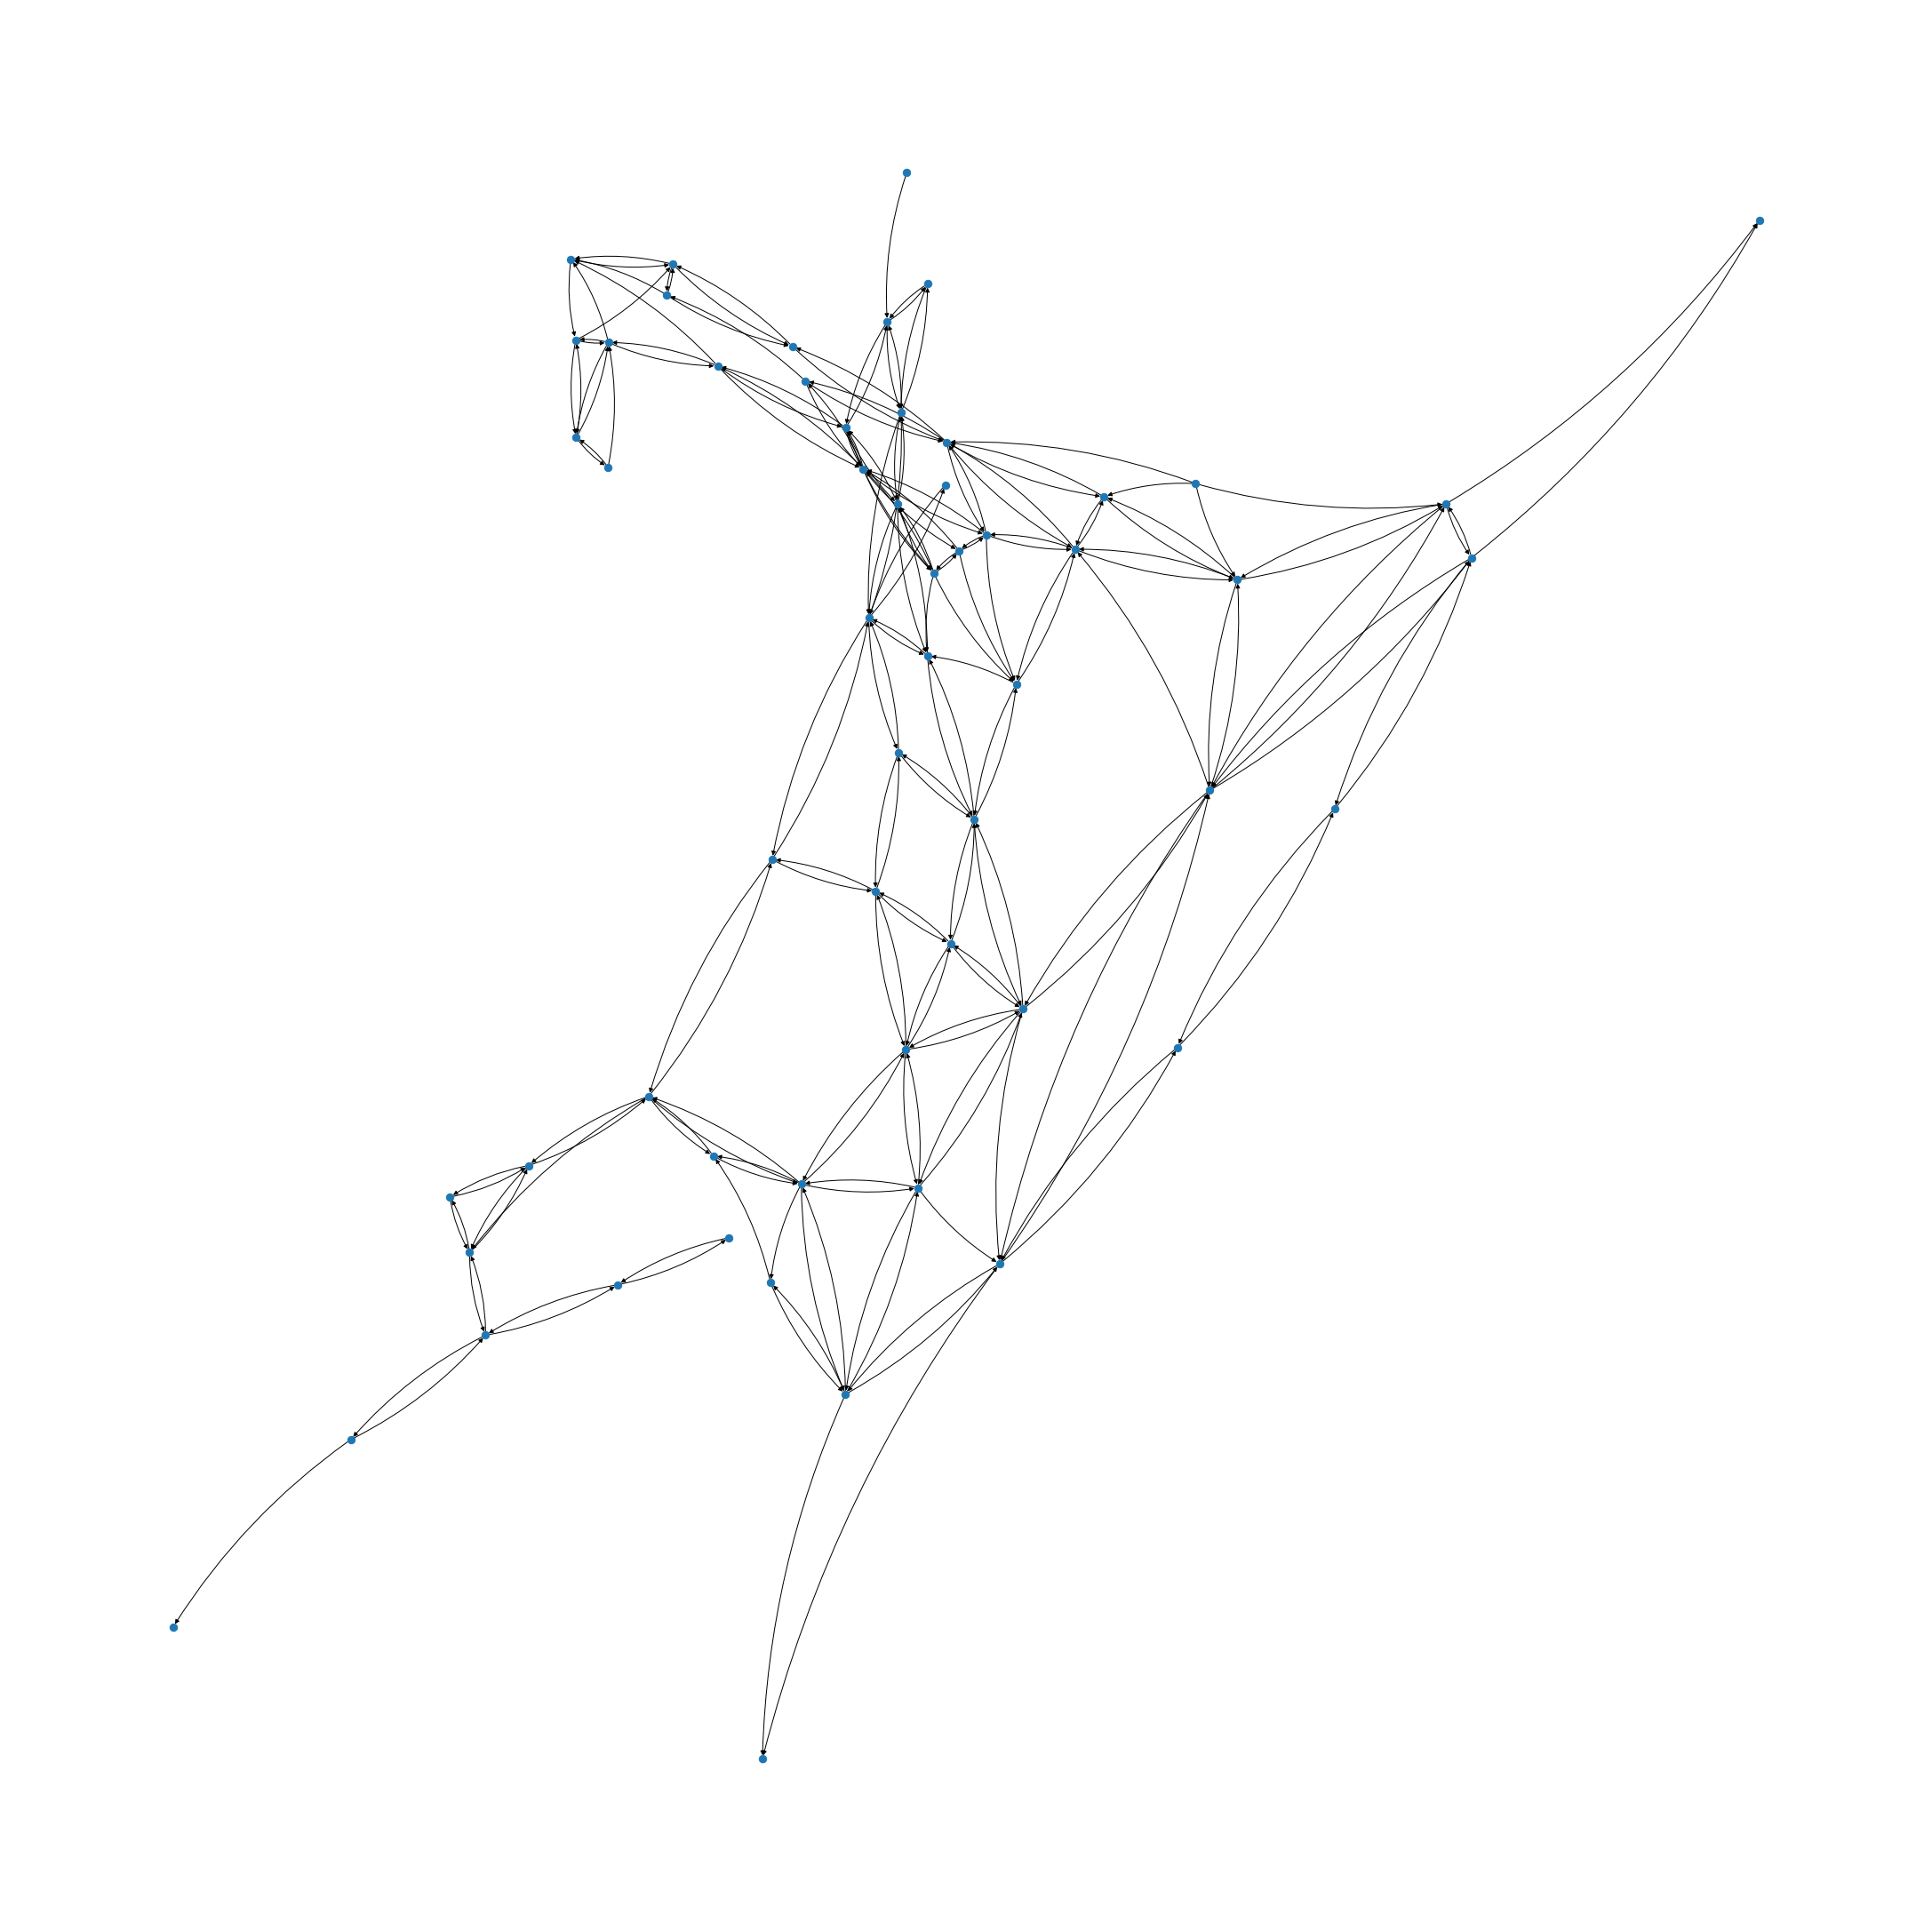

In [ ]:
plt.figure(1,figsize=(30,30)) 
nx.draw(RedEstatal,connectionstyle='arc3, rad = 0.1',node_size=70)
plt.show()

Como se puede observar en el mapa de los estados productores de gas natural, la red de gasoductos es muy basta en el Este de Estados Unidos, mientras que en el Oeste es más bien escaza, vamos estudiar la maxima capacidad de la red del Oeste con el objetivo de ver cuanto gas es posible comprarle a un megaproductor en Texas desde el estado de Washington . Para ello vamos a plantear la siguiente ruta:
![picture](https://drive.google.com/uc?export=view&id=1chtEPNp4PPM-CnlO-lHrk-hBW3qCYpGp) \\
Para ello vamos a plantear el siguiente problema lineal:
$$max \ \ \ \ \ x_{or,wa} $$
Donde $x_{or,wa}$ es la cantidad de gas que pasa de Oregon a Washington, sujeta a dos tipos de condiciones; la primera, la cantidad de gas que pasa por un gasoducto no debe exceder a su capacidad;la segunda, la cantidad de gas que entra a un estado debe ser lo que sale (porque se busca vender solo a Washington), usando el modulo PulP para solucionar nuestro problema de optimizacion lineal: 



In [ ]:
RutaOeste = pulp.LpProblem("Ruta Oeste", pulp.LpMinimize)
tuberias=np.array([('Texas','New Mexico',5022),('New Mexico','Arizona',6232),('Arizona','Nevada',165),('Arizona','California',6769),('California','Nevada',177),('Nevada','Oregon',1500),('Oregon','Idaho',481),('Oregon','Washington',883)])
#Se crean las variables
x1=pulp.LpVariable("(Texas,New Mexico)", 0)
x2=pulp.LpVariable("(New Mexico,Arizona)", 0)
x3=pulp.LpVariable("(Arizona,Nevana)", 0)
x4=pulp.LpVariable("(Arizona,California)", 0)
x5=pulp.LpVariable("(California,Nevada)", 0)
x6=pulp.LpVariable("(Nevada,Oregon)", 0)
x7=pulp.LpVariable("(Oregon,Idaho)", 0)
x8=pulp.LpVariable("(Oregon,Washington)", 0)
variables=[x1,x2,x3,x4,x5,x6,x7,x8]
RutaOeste += -x8 #Funcion objetivo
#Se agregan las restricciones de capacidad 
for i in range(0,8):
  RutaOeste += variables[i] <=int(tuberias[i][2]) 
#Se agregan las restricciones de flujo total( inflow=outflow )
RutaOeste += x1==x2
RutaOeste += x2==x3+x4
RutaOeste += x4==x5
RutaOeste += x3==x6
RutaOeste += x6==x7+x8

#Se soluciona el problema lineal:
RutaOeste.solve()
print("El estaus final de la solución es:", pulp.LpStatus[RutaOeste.status])
print("El valor de la función objetivo es: ", pulp.value(RutaOeste.objective))
print("Reporte de variables")
for v in RutaOeste.variables():
      print(v, "=", pulp.value(v))

El estaus final de la solución es: Optimal
El valor de la función objetivo es:  -165.0
Reporte de variables
(Arizona,California) = 0.0
(Arizona,Nevana) = 165.0
(California,Nevada) = 0.0
(Nevada,Oregon) = 165.0
(New_Mexico,Arizona) = 165.0
(Oregon,Idaho) = 0.0
(Oregon,Washington) = 165.0
(Texas,New_Mexico) = 165.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Es decir, que el flujo maximo diario de gas natural en esta red es de tan solo 165 millones de pies cubicos, contrario a los 954 millones de pies cubicos que se consumen diariamente en el estado de Washington pues es bastante poco. Por lo tanto vamos a tomar la siguiente opción de red: 
 
![picture](https://drive.google.com/uc?export=view&id=1OXjR3Tkgo_54mWR8wOR7IDEGU2CXaOnh) \\


In [ ]:
import pulp
import numpy as np

RutaOeste2 = pulp.LpProblem("Ruta Oeste 2", pulp.LpMinimize)
tuberias=np.array([('Texas','New Mexico',5022),('New Mexico','Colorado',250),('Colorado','Utah',563),('Colorado','Wyoming',4715),('Wyoming','Utah',5824),('Utah','Idaho',680),('Idaho','Washington',2561)])
#Se crean las variables
x1=pulp.LpVariable("(Texas,New Mexico)", 0)
x2=pulp.LpVariable("(New Mexico,Colorado)", 0)
x3=pulp.LpVariable("(Colorado,Utah)", 0)
x4=pulp.LpVariable("(Colorado,Wyoming)", 0)
x5=pulp.LpVariable("(Wyoming,Utah)", 0)
x6=pulp.LpVariable("(Utah,Idaho)", 0)
x7=pulp.LpVariable("(Idaho,Washington)", 0)
variables=[x1,x2,x3,x4,x5,x6,x7]
RutaOeste2 += -x7 #Funcion objetivo
#Se agregan las restricciones de capacidad 
for i in range(0,7):
  RutaOeste2 += variables[i] <=int(tuberias[i][2]) 
#Se agregan las restricciones de flujo total( inflow=outflow )
RutaOeste2 += x1==x2
RutaOeste2 += x2==x3+x4
RutaOeste2 += x4==x5
RutaOeste2 += x3==x6
RutaOeste2 += x6==x7

#Se soluciona el problema lineal:
RutaOeste2.solve()
print("El estaus final de la solución es:", pulp.LpStatus[RutaOeste2.status])
print("El valor de la función objetivo es: ", pulp.value(RutaOeste2.objective))
print("Reporte de variables")
for v in RutaOeste2.variables():
        print(v, "=", pulp.value(v))

El estaus final de la solución es: Optimal
El valor de la función objetivo es:  -250.0
Reporte de variables
(Colorado,Utah) = 250.0
(Colorado,Wyoming) = 0.0
(Idaho,Washington) = 250.0
(New_Mexico,Colorado) = 250.0
(Texas,New_Mexico) = 250.0
(Utah,Idaho) = 250.0
(Wyoming,Utah) = 0.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Con esta segunda ruta tenemos una mejoria de casi el doble del flujo, aunque sigue siendo escaso y esto es debido a la baja capacidad de los gasoductos en la region pacifica. Por ultimo, vamos a comprobar una caracteristica de el problema del maximo flujo y es que el flujo maximo es el que maximiza los flujos parciales de la red, cuando unimos las dos redes por el gasoducto de Oregon a Idaho tenemos la siguiente red:

![picture](https://drive.google.com/uc?export=view&id=1JMqNxIrKglwzG0616RNVWB4BYgjUibxx) \\

Con el siguiente flujo maximo:

In [ ]:

import pulp
import numpy as np

RutaOesteTotal = pulp.LpProblem("Ruta Oeste Total", pulp.LpMinimize)
tuberias=np.array([('Texas','New Mexico',5022),('New Mexico','Arizona',6232),('Arizona','Nevada',165),('Arizona','California',6769),('California','Nevada',177),('Nevada','Oregon',1500),('Oregon','Idaho',481),('Oregon','Washington',883),('New Mexico','Colorado',250),('Colorado','Utah',563),('Colorado','Wyoming',4715),('Wyoming','Utah',5824),('Utah','Idaho',680),('Idaho','Washington',2561)])
#Se crean las variables
x1=pulp.LpVariable("(Texas,New Mexico)", 0)
x2=pulp.LpVariable("(New Mexico,Arizona)", 0)
x3=pulp.LpVariable("(Arizona,Nevana)", 0)
x4=pulp.LpVariable("(Arizona,California)", 0)
x5=pulp.LpVariable("(California,Nevada)", 0)
x6=pulp.LpVariable("(Nevada,Oregon)", 0)
x7=pulp.LpVariable("(Oregon,Idaho)", 0)
x8=pulp.LpVariable("(Oregon,Washington)", 0)
x9=pulp.LpVariable("(New Mexico,Colorado)", 0)
x10=pulp.LpVariable("(Colorado,Utah)", 0)
x11=pulp.LpVariable("(Colorado,Wyoming)", 0)
x12=pulp.LpVariable("(Wyoming,Utah)", 0)
x13=pulp.LpVariable("(Utah,Idaho)", 0)
x14=pulp.LpVariable("(Idaho,Washington)", 0)
variables=[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14]
RutaOesteTotal += -x8-x14 #Funcion objetivo
#Se agregan las restricciones de capacidad 
for i in range(0,14):
  RutaOesteTotal += variables[i] <=int(tuberias[i][2]) 
#Se agregan las restricciones de flujo total( inflow=outflow )
RutaOesteTotal += x1==x2+x9
RutaOesteTotal += x2==x3+x4
RutaOesteTotal += x4==x5
RutaOesteTotal += x3==x6
RutaOesteTotal += x6==x7+x8
RutaOesteTotal += x9==x10+x11
RutaOesteTotal += x11==x12
RutaOesteTotal += x13==x10+x12
RutaOesteTotal += x14==x7+x13

#Se soluciona el problema lineal:
RutaOesteTotal.solve()
print("El estaus final de la solución es:", pulp.LpStatus[RutaOesteTotal.status])
print("El valor de la función objetivo es: ", pulp.value(RutaOesteTotal.objective))
print("Reporte de variables")
for v in RutaOesteTotal.variables():
        print(v, "=", pulp.value(v))

El estaus final de la solución es: Optimal
El valor de la función objetivo es:  -415.0
Reporte de variables
(Arizona,California) = 0.0
(Arizona,Nevana) = 165.0
(California,Nevada) = 0.0
(Colorado,Utah) = 250.0
(Colorado,Wyoming) = 0.0
(Idaho,Washington) = 415.0
(Nevada,Oregon) = 165.0
(New_Mexico,Arizona) = 165.0
(New_Mexico,Colorado) = 250.0
(Oregon,Idaho) = 165.0
(Oregon,Washington) = 0.0
(Texas,New_Mexico) = 415.0
(Utah,Idaho) = 250.0
(Wyoming,Utah) = 0.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


# Conclusiones.
La red nacional de gas natural de los Estados Unidos es de una gran magnitud y complejidad, es por esto que para garantizar la oferta de gas en todo el pais se debe optimizar la distribución de las tuberias y tambien las rutas del mismo. En el presente trabajo se plantearon dos tipos de rutas con el fin de comporar cual ruta tiene la mayor capacidad y para ello se uso optimización lineal, donde se obtuvo que aunque la segunda red tenga mayor capacidad ninguna cumple con la demanda del estado de Washington, lo cual evidencia una deficiencia en la red Oeste de Estados Unidos la cual debido al alto crecimiento en el consumo de gas natural se podria volver obsoleta, haciendo que los estados del Oeste dependan mucho de las exportaciones de gas de Canada Por ultimo, pudimos ver como si se maximan los caminos de una red, entonces se esta maximizando el flujo de la red total y es este preciso hecho que usa el conocido algoritmo de Ford-Fulkerson para solucionar problemas de flujo maximo.

# Bibliografia.
[1] Claudemir Duca Vasconcelos, Sérgio Ricardo Lourenço,Antonio Carlos Gracias,Douglas Alves Cassiano. *Network flows modeling applied to the natural gas pipeline in Brazil*. Journal of natural gas science and engineering, 2013. \\
[2] U.S. Energy information administration (EIA),2021.https://www.eia.gov/ .

